# COMSOL file 002.justfluid.001_out.np12.mph

- /Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/02.justFluid/002.justfluid.001_out.np12.mph

The objective is to find out if the fluid flow is fully developed after some distance Z from the point of perturbation where the fluid is no longer flowing down into the target but upwards. 

- laminar flow
- 2D axissymmetric study


<img src="02.justfluid.001.vel_magnitude.png" style="width: 15%">

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.ticker import AutoMinorLocator

In [16]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [17]:
fname = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/02.justFluid/02.justFluid.001.vel_magn.different_z.csv'
folder = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/02.justFluid/'

In [18]:
df = pd.read_csv(fname, skiprows=8)
df.columns = ['r', 'z', 'U']   # r coordinate, z coordinate, velocity magnitude in m/s
df.head()

,r,z,U
0,15.000000,0.0,1.919648e-15
1,15.053110,0.0,5.643202e-02
2,15.106220,0.0,6.147058e-02
3,15.162875,0.0,5.952222e-02
4,15.222070,0.0,5.299830e-02


Group by z values and plot U vs r

[  0   5  10  15  20  25  30  35  40  45  50 175]


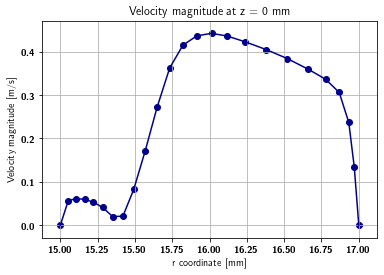

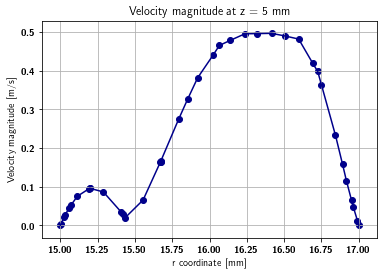

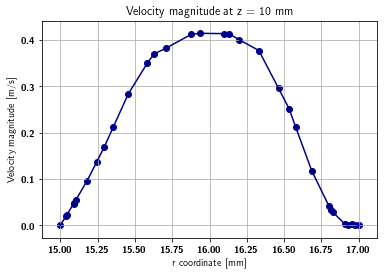

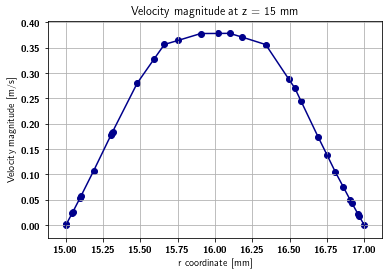

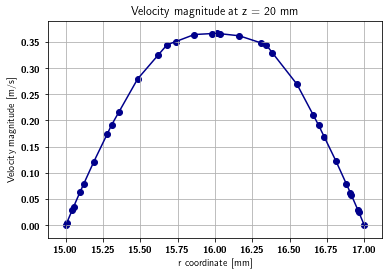

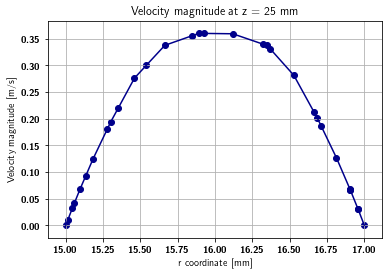

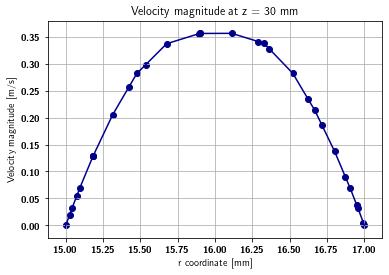

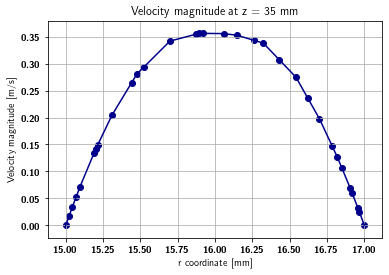

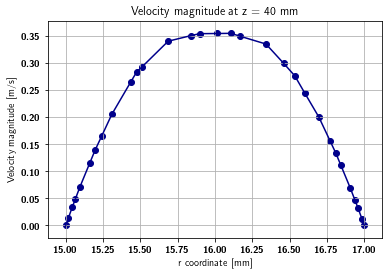

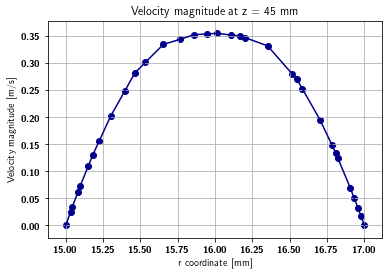

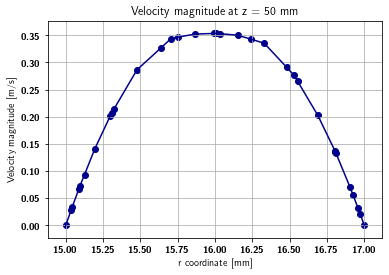

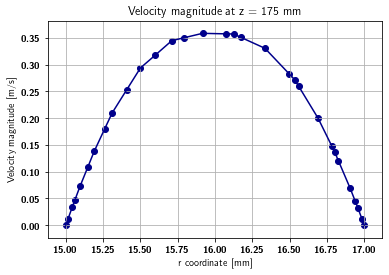

In [19]:
df['z'] = df['z'].astype(int)
z_values = np.array(df['z'].unique(), dtype=int)
print(z_values)

for z in z_values:
    this_df = df[ df['z'] == z ]
    this_df = this_df.sort_values(by=['r'])
    plt.plot(this_df['r'].values, this_df['U'].values, color='darkblue')
    plt.scatter(this_df['r'].values, this_df['U'].values, color='darkblue')
    plt.title(f'Velocity magnitude at z = {z} mm')
    plt.xlabel('r coordinate [mm]')
    plt.ylabel('Velocity magnitude [m/s]')
    plt.grid()
    plt.show()
    
    

Group by z values and plot U vs r difference relative to the z = 50 mm case

             r    z             U
377  15.000000  175  9.988421e-16
378  15.014533  175  1.137131e-02
379  15.043065  175  3.369577e-02
381  15.060504  175  4.671158e-02
373  15.094742  175  7.226458e-02


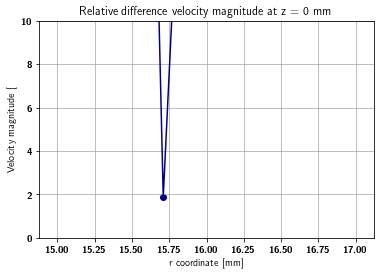

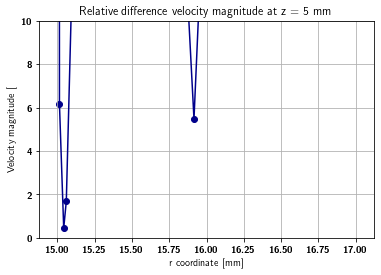

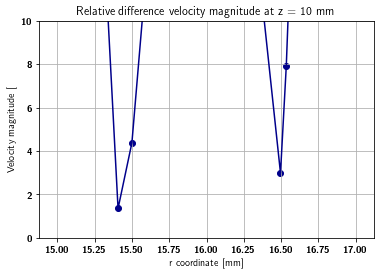

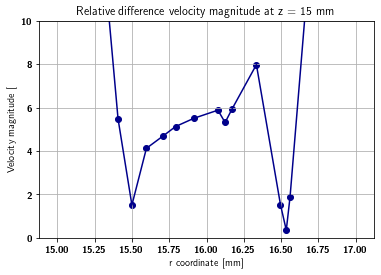

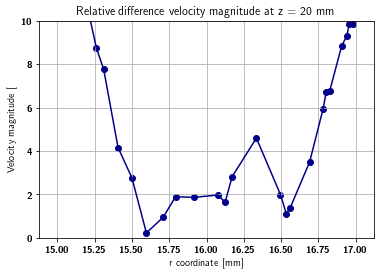

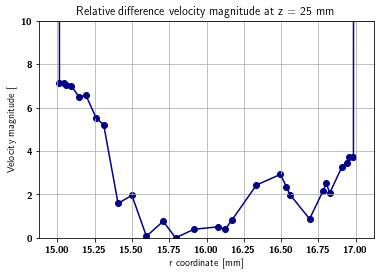

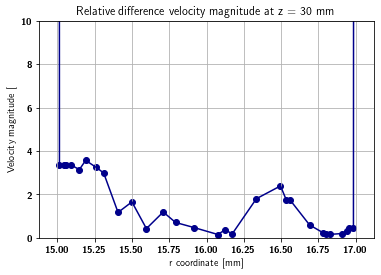

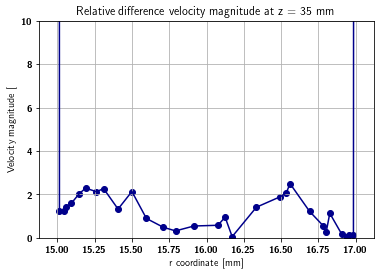

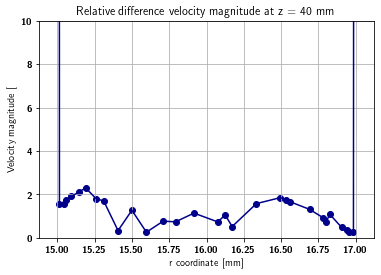

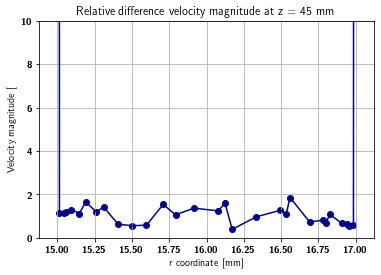

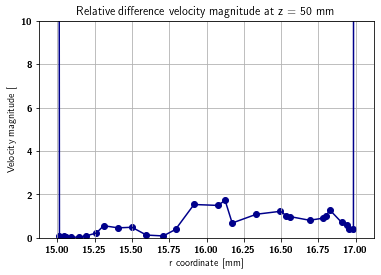

In [20]:

ref_df = df[ df['z'] == 175 ]
ref_df = ref_df.sort_values(by=['r'])
# interpolate
x = ref_df['r'].values

print(ref_df.head())
    
    
z_values = z_values[z_values < 175]

for z in z_values:
    this_df = df[ df['z'] == z ]
    this_df = this_df.sort_values(by=['r'])
    
    # interpolate the velocity magnitudes 
    interpU = interpolate.interp1d(this_df['r'].values, this_df['U'].values, fill_value='extrapolate')
    
    y0 = ref_df['U'].values
    y = interpU(x)
    
    rel_diff = 100.0*(np.abs(y-y0)/y0)
    
    plt.plot(x, rel_diff, color='darkblue')
    plt.scatter(x, rel_diff, color='darkblue')
    plt.title(f'Relative difference velocity magnitude at z = {z} mm')
    plt.xlabel('r coordinate [mm]')
    plt.ylabel('Velocity magnitude [%]')
    plt.ylim(0, 10)
    plt.grid()
    plt.show()
    

## Plot selected z values

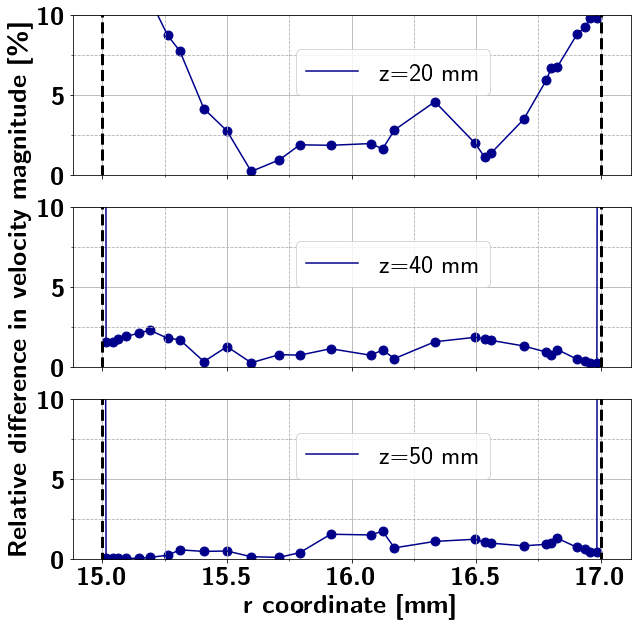

In [21]:
folder = '/Users/hkromer/polybox/Thesis/Chapters/RotatingIonBeamTarget/Figures/justfluid_fully_developed_flow/'
ref_df = df[ df['z'] == 175 ]
ref_df = ref_df.sort_values(by=['r'])
# interpolate
x = ref_df['r'].values

 
    
z_values = [20, 40, 50]
ys = []
for z in z_values:
    this_df = df[ df['z'] == z ]
    this_df = this_df.sort_values(by=['r'])
    # interpolate the velocity magnitudes 
    interpU = interpolate.interp1d(this_df['r'].values, this_df['U'].values, fill_value='extrapolate')
    
    y0 = ref_df['U'].values
    y = interpU(x)
    
    rel_diff = 100.0*(np.abs(y-y0)/y0)
    ys.append(rel_diff)

plt.figure(figsize=(10,10))
fs = 16+10
ls = 16+10
msize = 80

ax1 = plt.subplot(311)
plt.plot(x, ys[0], label=f'z={z_values[0]} mm', color='darkblue')
plt.scatter(x, ys[0], color='darkblue', s=msize)
# plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.title(f'Relative difference velocity magnitude')
plt.ylim(0, 10)
plt.grid()
legend = plt.legend(loc=(0.4,0.5), fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)
ax1.tick_params(axis = 'both', which = 'major', labelsize = ls)
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(x, ys[1], label=f'z={z_values[1]} mm', color='darkblue')
plt.scatter(x, ys[1], color='darkblue', s=msize)
plt.ylim(0, 10)
plt.ylabel(r'\textbf{Relative difference in velocity magnitude [\%]}', fontsize=fs)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)
plt.grid()

legend = plt.legend(loc=(0.4,0.5), fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)

ax2.tick_params(axis = 'both', which = 'major', labelsize = ls)
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax2.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax2.yaxis.set_minor_locator(minor_locator)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(x, ys[2], label=f'z={z_values[2]} mm', color='darkblue')
plt.scatter(x, ys[2], color='darkblue', s=msize)
plt.ylim(0, 10)

legend = plt.legend(loc=(0.4,0.5), fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)

ax3.tick_params(axis = 'both', which = 'major', labelsize = ls)
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax3.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax3.yaxis.set_minor_locator(minor_locator)
plt.grid()
for ax in [ax1, ax2, ax3]:
    ax.grid(b=True, which='major', linestyle='-')
    ax.grid(b=True, which='minor', linestyle='--')

for ax in [ax1, ax2, ax3]:
    ax.plot((15.0, 15.0), (-10, 100), 'k--', linewidth=3, color='black')#, label='wall-fluid interface')  # Cu-water interface
    ax.plot((17.0, 17.0), (-10, 100), 'k--', linewidth=3, color='black')#, label='wall-fluid interface')  # Cu-water interface

plt.xlabel(r'\textbf{r coordinate [mm]}',fontsize=fs)
plt.ylim(0, 10)
# plt.tight_layout()
# plt.savefig(f'{folder}/justfluid_fully_developed_flow.png', dpi=600)
plt.savefig(f'{folder}/justfluid_fully_developed_flow.pdf', dpi=600)
plt.show()